# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
X = pd.read_csv("orange_small_churn_data.txt")

In [3]:
y=pd.read_csv("orange_small_churn_labels.txt", header=None)

In [4]:
data=X.copy()

In [ ]:
#data["labels"]=y[0].values

In [5]:
data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


In [6]:
#столбцы, в которых нет значений
# 16 численных
# 2 категории

fail=[]
for i in data.columns:
    if (data[i].isnull().sum() == len(data[i])): fail.append(i)
print (len(fail),fail)

(18, ['Var8', 'Var15', 'Var20', 'Var31', 'Var32', 'Var39', 'Var42', 'Var48', 'Var52', 'Var55', 'Var79', 'Var141', 'Var167', 'Var169', 'Var175', 'Var185', 'Var209', 'Var230'])


In [7]:
data1=data.drop(fail, axis=1)
#Количественные признаки
#Заполнить пропущенные значения можно с помощью метода fillna. Заполним, например, медианными значениями.
#axis=0 по-прежнему указывает, что мы двигаемся сверху вниз:



In [8]:
data1 = data1.fillna(data1.median(axis=0), axis=0)

In [9]:


numerical_columns = data1.columns[:174]
categorical_columns = data1.columns[174:]
categorical_columns

Index([u'Var191', u'Var192', u'Var193', u'Var194', u'Var195', u'Var196',
       u'Var197', u'Var198', u'Var199', u'Var200', u'Var201', u'Var202',
       u'Var203', u'Var204', u'Var205', u'Var206', u'Var207', u'Var208',
       u'Var210', u'Var211', u'Var212', u'Var213', u'Var214', u'Var215',
       u'Var216', u'Var217', u'Var218', u'Var219', u'Var220', u'Var221',
       u'Var222', u'Var223', u'Var224', u'Var225', u'Var226', u'Var227',
       u'Var228', u'Var229'],
      dtype='object')

In [10]:
#Категориальные признаки
#Заполнение пропущенных значений самым популярным в столбце. 
data1_describe = data1.describe(include=[object])

for c in categorical_columns:
    data1[c] = data1[c].fillna(data1_describe[c]['top'])

In [11]:
data1["target"] = y

In [12]:
#Вначале выделим бинарные и небинарные признаки:
binary_columns    = [c for c in categorical_columns if data1_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data1_describe[c]['unique'] > 2]
print binary_columns, nonbinary_columns

['Var201', 'Var208', 'Var211', 'Var218'] ['Var192', 'Var193', 'Var194', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199', 'Var200', 'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207', 'Var210', 'Var212', 'Var214', 'Var216', 'Var217', 'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var225', 'Var226', 'Var227', 'Var228', 'Var229']


In [13]:
#Значения бинарных признаков просто заменим на 0 и 1.

for c in binary_columns:
    top = data1_describe[c]['top']
    top_items = data1[c] == top
    data1.loc[top_items, c] = 0
    data1.loc[np.logical_not(top_items), c] = 1

In [34]:
data1[binary_columns].describe()

,Var201,Var208,Var211,Var218
count,40000,40000,40000,40000
unique,2,2,2,2
top,0,0,0,0
freq,39994,36946,32215,20813


In [39]:
#Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, 
#в зависимости от того, чему равно значение исходного признака j.


#data_nonbinary = pd.get_dummies(data1[nonbinary_columns])
#print data_nonbinary.columns

2\. Рассчитайте доли классов `отток` и `не отток`.

In [15]:
#Доля оттока
float(sum(data1["target"]==1))/len(data1["target"])

0.0744

In [16]:
#Доля не оттока
float(sum(data1["target"]==-1))/len(data1["target"])

0.9256

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [54]:
#Для пары бинарный-бинарный - считаем Метьюса от -1 до 1
#Для пары бинарный - непрерывный - разность матожиданий на классах - неограничен
# категориальный - бинарный -коэф. крамера
len(numerical_columns)

174

In [17]:
ExpDif = []
for c in numerical_columns:
    ExpDif.append( np.abs(np.mean(data1[c][data1["target"] ==1 ])-np.mean(data1[c][data1["target"] ==-1 ])))

In [21]:
Num_Corr=dict(zip(numerical_columns, zip(ExpDif)))

In [55]:
# sorted_Num_Corr - список из Переменная числовая - корреляция с целевой, отсортированный по корреляциям по убыванию

import operator
sorted_Num_Corr = sorted(Num_Corr.items(), key=operator.itemgetter(1), reverse = True)



4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [60]:
import matplotlib.pyplot as plt


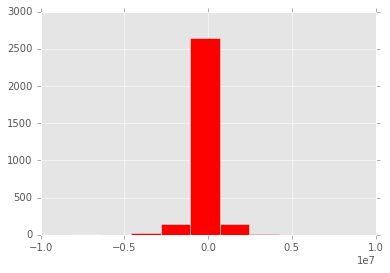

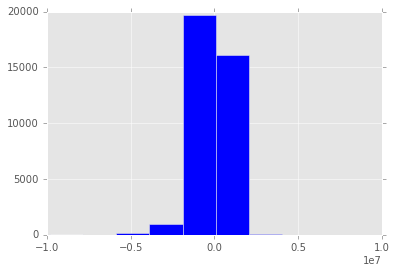

In [72]:
plt.figure(0)
plt.hist(data1[data1["target"]==1][sorted_Num_Corr[0][0]], color="red")
plt.figure(1)
plt.hist(data1[data1["target"]==-1][sorted_Num_Corr[0][0]], color="blue")
plt.show()

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?